# Grupo de Trabalho

- Aluno 1: Gabriela Zanotto Alves Rodrigues, RM551629
- Aluno 2: Augusto Barcelos Barros, RM98078
- Aluno 3: Gabriel Gribl de Carvalho, RM96270
- Aluno 4: Gabriel Souza de Queiroz, RM98570

## Fonte da Base de Dados

A base de dados utilizada neste projeto foi obtida de [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction].

In [8]:
import pandas as pd

# Carregar dados do CSV
data = pd.read_csv("heart.csv")

data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# Visualizar as primeiras linhas do DataFrame
primeiras_linhas = data.head()
print(primeiras_linhas)

# Informações gerais sobre os dados
informacoes_gerais = data.info()
print(informacoes_gerais)

# Estatísticas descritivas das variáveis numéricas
estatisticas_descritivas = data.describe()
print(estatisticas_descritivas)

# Contagem de valores únicos em cada coluna
contagem_valores_unicos = data.nunique()
print(contagem_valores_unicos)

# Verifique dados nulos
null_values = data.isnull().sum()

# Visualizar as últimas linhas do DataFrame
ultimas_linhas = data.tail()
print(ultimas_linhas)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [10]:
from sklearn.preprocessing import OneHotEncoder
import joblib

encoder = OneHotEncoder()

encoder.fit(data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

data_encoded = encoder.transform(data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]).toarray() #type: ignore

encoded_column_names = encoder.get_feature_names_out(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

data_encoded_df = pd.DataFrame(data_encoded, columns=encoded_column_names)

data_final = pd.concat([data, data_encoded_df], axis=1)

data_encoded = data_final.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)

joblib.dump(encoder, 'model/encoder.pickle')


['model/encoder.pickle']

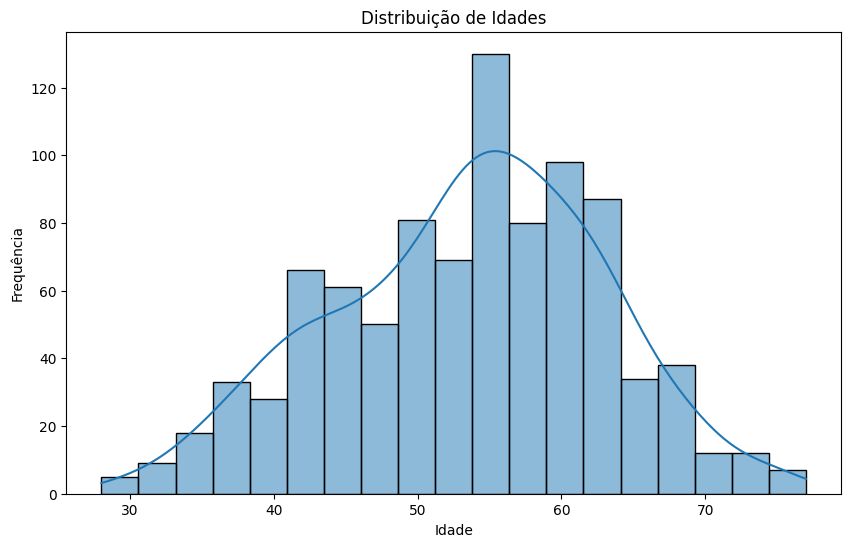

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Histograma da Idade
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


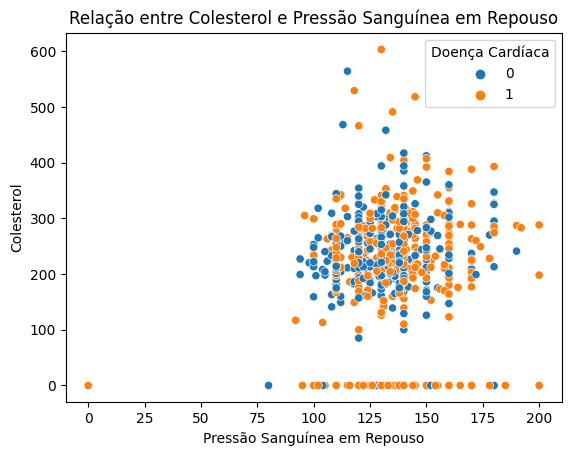

In [12]:
# Gráfico 2: Relação entre Colesterol e Pressão Sanguínea em Repouso
sns.scatterplot(x='RestingBP', y='Cholesterol', data=data, hue='HeartDisease')
plt.title('Relação entre Colesterol e Pressão Sanguínea em Repouso')
plt.xlabel('Pressão Sanguínea em Repouso')
plt.ylabel('Colesterol')
plt.legend(title='Doença Cardíaca', loc='upper right')
plt.show()

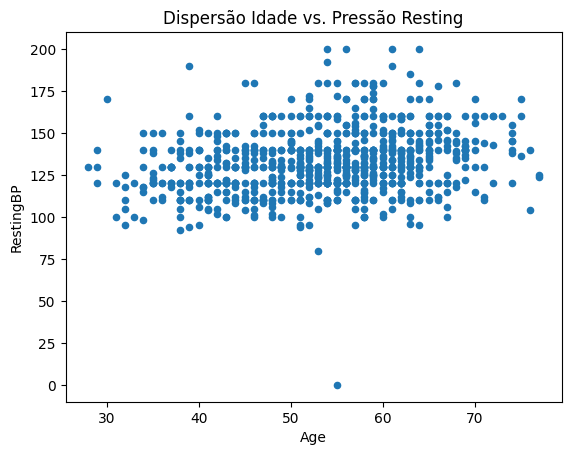

In [13]:
# Gráfico 3: Dispersão entre Age e RestingBP
data.plot.scatter(x='Age', y='RestingBP', title='Dispersão Idade vs. Pressão Resting', legend=True)
plt.show()


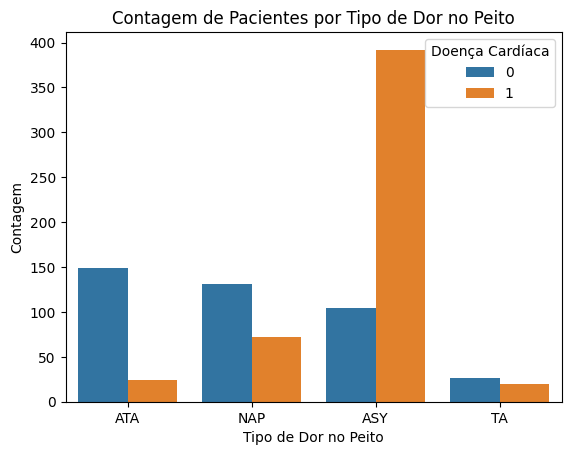

In [14]:
# Gráfico 4: Contagem de Pacientes por Tipo de Dor no Peito
sns.countplot(x='ChestPainType', data=data, hue='HeartDisease')
plt.title('Contagem de Pacientes por Tipo de Dor no Peito')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca', loc='upper right')
plt.show()

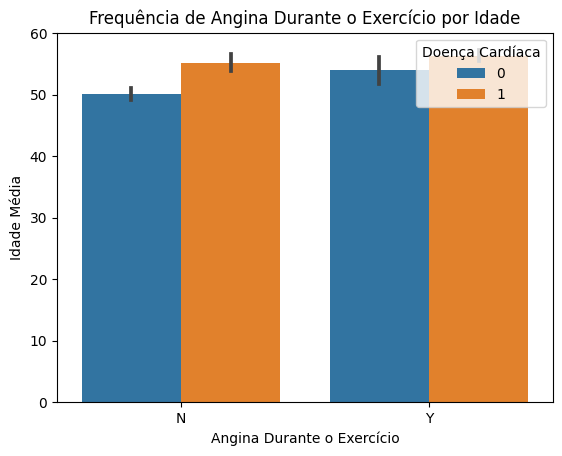

In [15]:
# Gráfico 5: Gráfico de Barras para a Frequência de Angina Durante o Exercício
sns.barplot(x='ExerciseAngina', y='Age', data=data, hue='HeartDisease')
plt.title('Frequência de Angina Durante o Exercício por Idade')
plt.xlabel('Angina Durante o Exercício')
plt.ylabel('Idade Média')
plt.legend(title='Doença Cardíaca', loc='upper right')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Seleção de features e label
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Previsões e avaliação
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas de classificação
print(f'Acurácia (Classificação): {accuracy}')
print(f'Precisão (Classificação): {precision}')
print(f'Recall (Classificação): {recall}')
print(f'F1-Score (Classificação): {f1}')

0.8532608695652174
Acurácia (Classificação): 0.8532608695652174
Precisão (Classificação): 0.9
Recall (Classificação): 0.8411214953271028
F1-Score (Classificação): 0.8695652173913043


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar modelo de classificação
modelo_classificacao = RandomForestClassifier(n_estimators=500)
modelo_classificacao.fit(X_train, y_train)

# Fazer previsões
y_pred_classificacao = modelo_classificacao.predict(X_test)

# Avaliar o desempenho do modelo
acuracia_classificacao = accuracy_score(y_test, y_pred_classificacao)
relatorio_classificacao = classification_report(y_test, y_pred_classificacao)

# Exibir resultados
print(f'Acurácia (Classificação): {acuracia_classificacao}')
print(f'Relatório de Classificação: \n{relatorio_classificacao}')


Acurácia (Classificação): 0.875
Relatório de Classificação: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [18]:
joblib.dump(modelo_classificacao, 'model/model.pickle')

['model/model.pickle']

In [19]:
# Avaliação do Modelo de Regressão Logística
accuracy = accuracy_score(y_test, predictions)

print(f'Acurácia do Modelo: {accuracy * 100:.2f}%')

Acurácia do Modelo: 85.33%


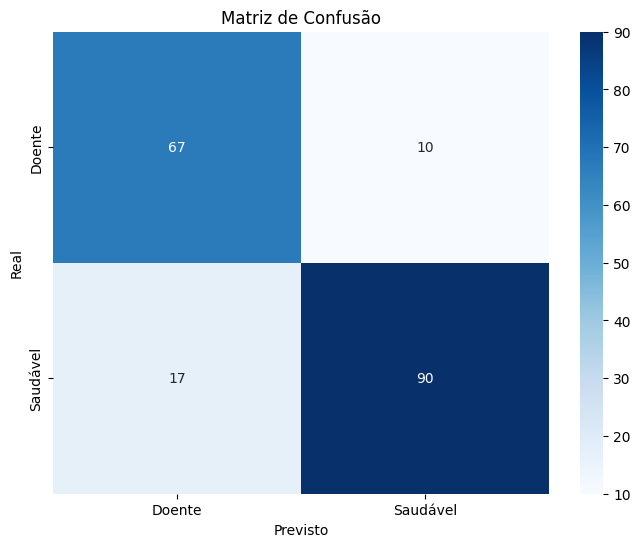

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    # Mostra os tipos invés dos números
    xticklabels=["Doente", "Saudável"],  # type: ignore
    yticklabels=["Doente", "Saudável"],  # type: ignore
)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()